In [1]:
# Importamos librerías de análisis de datos
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
from pywaffle import Waffle

In [2]:
# Cargamos el dataframe
df = pd.read_csv('train.csv', index_col='id', parse_dates=['fecha'])

In [3]:
# Reviso columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240000 entries, 254099 to 121958
Data columns (total 22 columns):
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240000 non-null datetime64[ns]
gimnasio           

In [4]:
# Agrego columna de precio por metro cuadrado
# Agrego columna de largo de titulo
df['largotitulo'] = df['titulo'].str.len()
def precio_por_metros_totales(precio, metros):
        return precio/metros

df['precioXmetro'] = df.apply(lambda x: precio_por_metros_totales(x['precio'], x['metrostotales']), axis=1)
df['precioXmetroXcaracter'] = df.apply(lambda x: x['precioXmetro']/x['largotitulo'], axis=1)

In [6]:
df.loc[2].precioXmetroXcaracter

291.6666666666667

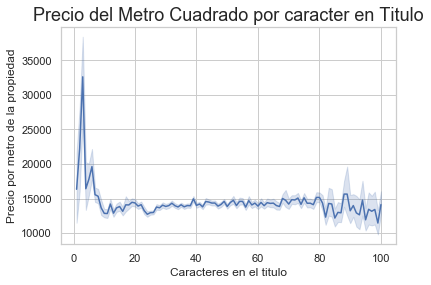

In [13]:
g = sns.lineplot(x=df.largotitulo, y=df.precioXmetro,)
g.set_title("Precio del Metro Cuadrado vs Largo del Titulo", fontsize=18)
g.set_xlabel("Caracteres en el titulo", fontsize=12)
g.set_ylabel("Precio por metro de la propiedad", fontsize=12);

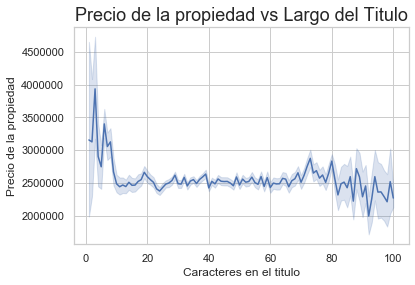

In [15]:
g = sns.lineplot(x=df.largotitulo, y=df.precio,)
g.set_title("Precio de la propiedad vs Largo del Titulo", fontsize=18)
g.set_xlabel("Caracteres en el titulo", fontsize=12)
g.set_ylabel("Precio de la propiedad", fontsize=12);

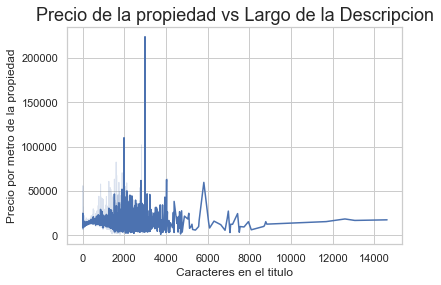

In [17]:
df['largodescripcion'] = df['descripcion'].str.len()
g = sns.lineplot(x=df.largodescripcion, y=df.precioXmetro,)
g.set_title("Precio del Metro Cuadrado vs Largo de la Descripcion", fontsize=18)
g.set_xlabel("Caracteres en el titulo", fontsize=12)
g.set_ylabel("Precio por metro de la propiedad", fontsize=12);

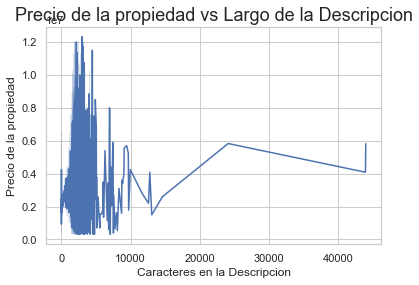

In [19]:
g = sns.lineplot(x=df.largodescripcion, y=df.precio,)
g.set_title("Precio de la propiedad vs Largo de la Descripcion", fontsize=18)
g.set_xlabel("Caracteres en la Descripcion", fontsize=12)
g.set_ylabel("Precio de la propiedad", fontsize=12);